<a href="https://colab.research.google.com/github/HwangSH1/Data/blob/main/%EC%8B%A4%EC%8A%B51_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EA%B8%B0%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 1: 데이터 전처리 기초


---

## 📚 학습 목표

이 실습에서는 머신러닝 프로젝트의 핵심인 데이터 전처리의 기본 개념과 실무 기법을 학습합니다.

데이터 전처리는 원시 데이터를 머신러닝 모델이 학습할 수 있는 형태로 변환하는 과정으로, 모델의 성능과 신뢰도를 결정짓는 중요한 단계입니다.

데이터 수집 후 전체 프로젝트 시간의 60~80%를 차지하는 전처리 과정을 통해 데이터의 품질을 향상시키고, 모델이 효과적으로 패턴을 학습할 수 있는 환경을 조성합니다.

이번 실습에서는 주택 가격 데이터를 활용하여 결측치 처리, 이상치 탐지 및 처리, 데이터 인코딩, 데이터 스케일링 등의 핵심 전처리 기법을 실습하고, 전처리된 데이터로 간단한 머신러닝 모델을 구축합니다.

추가로 부록에서는 텍스트 데이터와 이미지 데이터의 기본 전처리 방법도 다룹니다.

---

## 1. 환경 설정 및 라이브러리 임포트


Pandas는 DataFrame을 출력할 때 행과 열의 최대 표시 개수를 제한합니다. `pd.set_option()` 함수는 이러한 Pandas의 전역 옵션을 설정하는 함수로, 'display.max_columns'는 출력할 최대 열 개수를, 'display.width'는 출력 창의 너비를 의미합니다. None으로 설정하면 모든 열을 표시하고 자동으로 줄바꿈을 처리합니다.

In [15]:
# 경고 메시지 제어를 위한 warnings 모듈 임포트
import warnings
# 모든 경고 메시지를 무시하도록 설정 (실습 환경 최적화)
warnings.filterwarnings('ignore')

# Pandas 라이브러리 임포트 (데이터 조작 및 분석)
import pandas as pd
# Pandas 출력 옵션 설정: 모든 열을 표시하도록 최대 열 개수 제한 해제
pd.set_option('display.max_columns', None)
# Pandas 출력 옵션 설정: 출력 창의 너비를 자동으로 조정하도록 설정
pd.set_option('display.width', None)

### 1.2 필수 라이브러리 임포트 및 이해

데이터 전처리 및 머신러닝에 필요한 핵심 라이브러리들을 임포트합니다. 각 라이브러리는 데이터 과학 생태계에서 특정한 역할을 수행하며, 서로 유기적으로 연결되어 작동합니다.

In [16]:
# 데이터 처리 및 분석
import numpy as np   # 수치 연산

# 시각화
import matplotlib.pyplot as plt  # 기본 그래프
import seaborn as sns            # 고급 시각화

# 전처리 도구
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # 스케일링
from sklearn.preprocessing import LabelEncoder, OneHotEncoder                # 인코딩

# 시각화 스타일 설정
plt.style.use('seaborn-v0_8')  # 그래프 스타일 설정
sns.set_palette("husl")        # 색상 팔레트 설정

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


### 1.3 핵심 라이브러리 상세 설명

데이터 전처리와 머신러닝에 사용되는 각 라이브러리의 구조와 원리를 이해합니다.

---

#### <img src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Pandas_logo.svg" height="60px" /> **Pandas (Python Data Analysis Library)**

Pandas는 테이블 형태의 데이터를 다루기 위한 Python 라이브러리입니다.

**핵심 데이터 구조**

Pandas는 두 가지 핵심 데이터 구조를 제공합니다. Series는 1차원 레이블 배열로, 내부적으로 NumPy 배열을 기반으로 구축되며 각 데이터에 인덱스 레이블을 부여하여 위치 기반 접근과 레이블 기반 접근을 모두 지원합니다. DataFrame은 2차원 레이블 테이블 구조로, 여러 개의 Series를 열(Column)로 포함하며 행(Row) 인덱스와 열(Column) 인덱스를 동시에 가집니다.

**설계 원리와 최적화**

Pandas는 각 열(Column)이 동일한 데이터 타입을 가지도록 설계되어 메모리 효율성과 연산 속도를 최적화합니다. 내부적으로 NumPy 배열을 백엔드로 사용하여 빠른 벡터화 연산을 수행하며, 인덱스 기반 정렬과 조인 연산을 통해 데이터베이스와 유사한 연산을 제공합니다.

**주요 API**

데이터 입출력 함수로는 read_csv, read_excel, to_csv 등이 있으며, 데이터 탐색 함수로는 head, info, describe, isnull 등이 있습니다. 데이터 조작 함수로는 fillna, dropna, groupby, merge, concat 등이 제공되며, 인코딩 함수로는 get_dummies 등이 있습니다.

---

#### <img src="https://upload.wikimedia.org/wikipedia/commons/3/31/NumPy_logo_2020.svg" height="60px" /> **NumPy (Numerical Python)**

NumPy는 Python에서 수치 연산을 위한 기본 라이브러리입니다.

**핵심 데이터 구조: ndarray**

NumPy의 핵심은 N차원 배열 객체인 ndarray입니다. Python의 기본 리스트와 달리 ndarray는 연속된 메모리 공간에 동일한 데이터 타입의 요소들을 저장합니다. 이러한 구조는 CPU 캐시 효율성을 높이고 벡터화 연산을 가능하게 합니다.

**메모리 효율성과 성능**

ndarray는 동적 타입 체크가 필요한 Python 리스트와 달리 고정된 데이터 타입을 사용하여 메모리 오버헤드를 최소화합니다. 연속된 메모리 배치로 인해 전체 배열에 대한 연산을 반복문 없이 한 번에 수행하는 벡터화가 가능하며, 이는 C 언어 수준의 속도를 제공합니다.

**NumPy와 Pandas의 관계**

Pandas의 모든 수치 연산은 내부적으로 NumPy 배열을 사용합니다. DataFrame의 각 열은 NumPy 배열로 저장되며, Pandas는 이 위에 인덱스 레이블과 칼럼 이름이라는 메타데이터 계층을 추가한 것입니다.

---

#### <img src="https://upload.wikimedia.org/wikipedia/commons/0/05/Scikit_learn_logo_small.svg" height="60px" /> **Scikit-learn**

Scikit-learn은 Python의 대표적인 머신러닝 라이브러리로, 일관된 API 설계를 통해 다양한 알고리즘과 전처리 도구를 제공합니다.

**Transformer API 패턴**

Scikit-learn의 전처리 클래스들은 fit과 transform이라는 두 단계 API를 따릅니다. fit 메서드는 훈련 데이터로부터 통계량이나 파라미터를 학습하고, transform 메서드는 학습된 파라미터를 사용하여 데이터를 변환합니다. 이러한 분리는 데이터 누수를 방지하는 핵심 원리입니다.

**데이터 누수 방지 원리**

훈련 데이터로 fit을 수행하여 스케일링 파라미터나 인코딩 매핑을 학습한 후, 동일한 파라미터로 테스트 데이터를 transform합니다. 테스트 데이터로 별도의 fit을 수행하면 테스트 데이터의 정보가 모델에 유입되는 데이터 누수가 발생하여 모델 평가가 부정확해집니다.

**주요 전처리 도구**

StandardScaler와 MinMaxScaler는 수치형 데이터의 스케일을 조정하며, LabelEncoder와 OneHotEncoder는 범주형 데이터를 수치형으로 변환합니다. SimpleImputer는 결측치를 처리하며, train_test_split은 데이터를 훈련 세트와 테스트 세트로 분할합니다.

---

#### <img src="https://upload.wikimedia.org/wikipedia/commons/8/84/Matplotlib_icon.svg" height="60px" /> **Matplotlib**

Matplotlib은 Python의 기본 시각화 라이브러리로, 다양한 그래프와 차트를 생성할 수 있습니다.

**pyplot 인터페이스**

matplotlib.pyplot 모듈은 MATLAB 스타일의 간편한 인터페이스를 제공합니다. plt.plot, plt.scatter, plt.hist와 같은 함수들은 현재 활성화된 Figure와 Axes 객체에 자동으로 그림을 그립니다.

**Figure와 Axes 구조**

Matplotlib은 계층적 구조를 가집니다. Figure는 전체 그림 창을 나타내는 최상위 컨테이너이며, Axes는 실제 플롯이 그려지는 영역으로 하나의 Figure에 여러 Axes를 배치할 수 있습니다.

**기본 사용법**

이번 실습에서는 데이터 분포 확인을 위한 히스토그램, 결측치 분포 확인을 위한 막대 그래프, 이상치 확인을 위한 산점도 등 기본적인 시각화 기능만 사용합니다. 더 복잡한 통계 시각화는 별도의 시각화 실습에서 다룹니다.

## 2. 데이터 다운로드 및 로드

### 2.1 House Prices 데이터셋 소개

이번 실습에서는 Kaggle의 House Prices 데이터셋을 사용합니다. 이 데이터는 미국 아이오와주 에임스시의 주택 가격과 관련된 다양한 특성을 포함하고 있으며, 총 80개 이상의 변수로 구성되어 있습니다.

이 데이터셋은 전처리 학습에 매우 적합한 특성을 가지고 있습니다. 결측치가 30~40% 정도로 많은 변수들이 포함되어 있어 다양한 결측치 처리 전략을 실습할 수 있으며, 수치형 변수와 범주형 변수가 골고루 분포되어 있어 인코딩과 스케일링을 모두 연습할 수 있습니다. 또한 가격 데이터 특성상 이상치가 존재하여 이상치 탐지 및 처리 기법을 적용해볼 수 있습니다.

---

### 2.2 데이터 로드

참고로 Kaggle에서 데이터를 직접 다운로드하는 방법은 다음과 같습니다.

1. Kaggle 계정 생성 및 로그인
2. Account 설정에서 Legacy API Key 생성 후 kaggle.json 파일 다운로드
3. kaggle.json 파일을 ~/.kaggle/ 경로에 저장

아래 명령어 실행

```
!mkdir -p /root/.config/kaggle
!ln -s $(pwd)/kaggle.json /root/.config/kaggle/kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques
```


In [17]:
!mkdir -p /root/.config/kaggle
!ln -s $(pwd)/kaggle.json /root/.config/kaggle/kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json

!kaggle competitions download -c house-prices-advanced-regression-techniques

chmod: cannot operate on dangling symlink '/root/.config/kaggle/kaggle.json'
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [18]:
!unzip /content/house-prices-advanced-regression-techniques.zip

unzip:  cannot find or open /content/house-prices-advanced-regression-techniques.zip, /content/house-prices-advanced-regression-techniques.zip.zip or /content/house-prices-advanced-regression-techniques.zip.ZIP.


### 2.3 데이터 로드

이제 다운로드한 CSV 파일을 pandas로 읽어옵니다.

**pandas.read_csv() 함수 설명:**
- CSV 파일을 데이터프레임으로 읽어옵니다.
- `train.csv`: 학습용 데이터 (타겟 변수 포함)
- `test.csv`: 테스트용 데이터 (타겟 변수 없음)


In [19]:
train_df = pd.read_csv('train.csv')
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [20]:
# 데이터 로드
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 데이터 크기 확인
print("학습 데이터 크기:", train_df.shape)
print("테스트 데이터 크기:", test_df.shape)
print("\n학습 데이터 컬럼 수:", len(train_df.columns))
print("테스트 데이터 컬럼 수:", len(test_df.columns))


학습 데이터 크기: (1460, 81)
테스트 데이터 크기: (1459, 80)

학습 데이터 컬럼 수: 81
테스트 데이터 컬럼 수: 80


## 3. 데이터 탐색 (EDA - Exploratory Data Analysis)

데이터를 처리하기 전에 먼저 데이터를 잘 이해해야 합니다. 이를 탐색적 데이터 분석(EDA)이라고 합니다.

### 3.1 데이터 기본 정보 확인

**주요 함수 설명:**
- `head()`: 데이터의 처음 5개 행을 보여줍니다.
- `info()`: 데이터의 기본 정보(컬럼명, 데이터 타입, 결측치 개수)를 보여줍니다.
- `describe()`: 수치형 변수의 통계 요약(평균, 표준편차, 최솟값, 최댓값 등)을 보여줍니다.


In [21]:
# 데이터 처음 5개 행 확인
print("=== 학습 데이터 처음 5개 행 ===")
train_df.head()


=== 학습 데이터 처음 5개 행 ===


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
# 데이터 기본 정보 확인
print("=== 학습 데이터 기본 정보 ===")
train_df.info()

=== 학습 데이터 기본 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   

| 컬럼명           | 설명                   |
| ------------- | -------------------- |
| Id            | 각 주택의 고유 식별자         |
| MSSubClass    | 주택 건물 유형 코드          |
| MSZoning      | 일반 구역 분류 (주거/상업 등)   |
| LotFrontage   | 도로와 맞닿은 대지의 길이       |
| LotArea       | 대지 면적 (제곱피트)         |
| Street        | 도로 접근 유형             |
| Alley         | 골목 접근 유형             |
| LotShape      | 대지 형태                |
| LandContour   | 대지 평탄도               |
| Utilities     | 사용 가능한 공공설비 종류       |
| LotConfig     | 대지 배치 형태             |
| LandSlope     | 대지 경사                |
| Neighborhood  | 근린 지역 이름             |
| Condition1    | 주요 도로/철도 등과의 근접 조건   |
| Condition2    | 보조적인 근접 조건           |
| BldgType      | 건물 유형                |
| HouseStyle    | 주택 구조 스타일            |
| OverallQual   | 전체 마감 및 재료 품질 (1~10) |
| OverallCond   | 전체 상태 평가 (1~10)      |
| YearBuilt     | 건축 연도                |
| YearRemodAdd  | 리모델링 연도              |
| RoofStyle     | 지붕 형태                |
| RoofMatl      | 지붕 재질                |
| Exterior1st   | 외벽 주요 재질             |
| Exterior2nd   | 외벽 보조 재질             |
| MasVnrType    | 석재 베니어 유형            |
| MasVnrArea    | 석재 베니어 면적            |
| ExterQual     | 외부 재질 품질             |
| ExterCond     | 외부 상태                |
| Foundation    | 기초 구조 유형             |
| BsmtQual      | 지하실 높이/품질            |
| BsmtCond      | 지하실 상태               |
| BsmtExposure  | 지하실 채광/노출 정도         |
| BsmtFinType1  | 지하실 마감 유형 1          |
| BsmtFinSF1    | 지하실 마감 면적 1          |
| BsmtFinType2  | 지하실 마감 유형 2          |
| BsmtFinSF2    | 지하실 마감 면적 2          |
| BsmtUnfSF     | 지하실 미마감 면적           |
| TotalBsmtSF   | 지하실 전체 면적            |
| Heating       | 난방 방식                |
| HeatingQC     | 난방 품질                |
| CentralAir    | 중앙 냉방 여부             |
| Electrical    | 전기 시스템               |
| 1stFlrSF      | 1층 면적                |
| 2ndFlrSF      | 2층 면적                |
| LowQualFinSF  | 저품질 마감 면적            |
| GrLivArea     | 지상 거주 면적 합계          |
| BsmtFullBath  | 지하실 완전 욕실 수          |
| BsmtHalfBath  | 지하실 반 욕실 수           |
| FullBath      | 지상 완전 욕실 수           |
| HalfBath      | 지상 반 욕실 수            |
| BedroomAbvGr  | 지상 침실 수              |
| KitchenAbvGr  | 주방 수                 |
| KitchenQual   | 주방 품질                |
| TotRmsAbvGrd  | 욕실 제외 전체 방 수         |
| Functional    | 주택 기능성 평가            |
| Fireplaces    | 벽난로 수                |
| FireplaceQu   | 벽난로 품질               |
| GarageType    | 차고 유형                |
| GarageYrBlt   | 차고 건축 연도             |
| GarageFinish  | 차고 마감 상태             |
| GarageCars    | 수용 가능한 차량 수          |
| GarageArea    | 차고 면적                |
| GarageQual    | 차고 품질                |
| GarageCond    | 차고 상태                |
| PavedDrive    | 진입로 포장 여부            |
| WoodDeckSF    | 목재 데크 면적             |
| OpenPorchSF   | 개방형 현관 면적            |
| EnclosedPorch | 폐쇄형 현관 면적            |
| 3SsnPorch     | 3계절용 현관 면적           |
| ScreenPorch   | 스크린 현관 면적            |
| PoolArea      | 수영장 면적               |
| PoolQC        | 수영장 품질               |
| Fence         | 울타리 유형               |
| MiscFeature   | 기타 특이 시설             |
| MiscVal       | 기타 시설 가치             |
| MoSold        | 판매 월                 |
| YrSold        | 판매 연도                |
| SaleType      | 판매 유형                |
| SaleCondition | 판매 조건                |
| SalePrice     | 주택 판매 가격 (타깃 변수)     |


In [23]:
# 수치형 변수의 통계 요약
print("=== 수치형 변수 통계 요약 ===")
train_df.describe()


=== 수치형 변수 통계 요약 ===


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [27]:
a = train_df['SalePrice']
a.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


### 3.2 타겟 변수 확인

타겟 변수(SalePrice)의 분포를 확인해봅시다. 타겟 변수를 이해하는 것은 매우 중요합니다!


In [28]:
# 타겟 변수(SalePrice) 확인
target = train_df['SalePrice']

print("타겟 변수 기본 통계:")
print(target.describe())
print(f"\n최솟값: {target.min():,.0f}")
print(f"최댓값: {target.max():,.0f}")
print(f"평균: {target.mean():,.0f}")
print(f"중앙값: {target.median():,.0f}")


타겟 변수 기본 통계:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

최솟값: 34,900
최댓값: 755,000
평균: 180,921
중앙값: 163,000


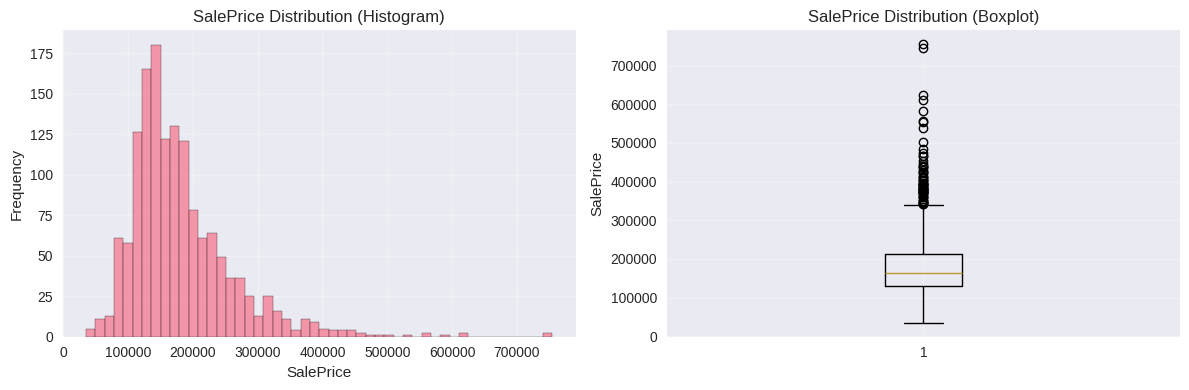

히스토그램: 데이터의 분포를 보여줍니다.
박스플롯: 이상치를 탐지하는 데 유용합니다.


In [30]:
# 타겟 변수 분포 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 히스토그램(1열)
axes[0].hist(target, bins=50, edgecolor='black', alpha=0.7) # 분포도
axes[0].set_title('SalePrice Distribution (Histogram)')
axes[0].set_xlabel('SalePrice')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# 박스플롯(2열)
axes[1].boxplot(target, vert=True) # 이상치(산점도)
axes[1].set_title('SalePrice Distribution (Boxplot)')
axes[1].set_ylabel('SalePrice')
axes[1].grid(True, alpha=0.3)

plt.tight_layout() # 간격조절
plt.show() # 그래프 출력

print("히스토그램: 데이터의 분포를 보여줍니다.")
print("박스플롯: 이상치를 탐지하는 데 유용합니다.")


**결과 해석:**
- 히스토그램을 보면 타겟 변수가 정규분포에 가깝지만 약간 오른쪽으로 치우쳐 있습니다 (right-skewed).
- 박스플롯에서 박스 밖의 점들은 이상치일 가능성이 있습니다.
- 나중에 로그 변환 등을 통해 분포를 정규화할 수 있습니다.

### 3.3 결측치 확인

결측치(Missing Values)는 데이터에서 값이 없는 경우를 말합니다. 결측치를 확인하고 처리하는 것은 전처리의 핵심입니다!


In [33]:
train_df.isnull()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [34]:
train_df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [35]:
len(train_df)


1460

In [36]:
(missing_count / len(train_df)) * 100

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


In [40]:
missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing Count': missing_count.values,
    'Missing Percent': missing_percent.values
})
missing_df

,Column,Missing Count,Missing Percent
0,Id,0,0.000000
1,MSSubClass,0,0.000000
2,MSZoning,0,0.000000
3,LotFrontage,259,17.739726
4,LotArea,0,0.000000
...,...,...,...
76,MoSold,0,0.000000
77,YrSold,0,0.000000
78,SaleType,0,0.000000
79,SaleCondition,0,0.000000


In [42]:
# 결측치 확인
missing_count = train_df.isnull().sum()  # 각 컬럼별 결측치 개수
missing_percent = (missing_count / len(train_df)) * 100  # 결측치 비율

# 결측치가 있는 컬럼만 필터링
missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing Count': missing_count.values,
    'Missing Percent': missing_percent.values
})

# 데이터프레임에서 원하는 조건으로 필터링 -> df[df['col'] == 조건]
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("=== 결측치가 있는 컬럼 ===")
print(missing_df)
print(f"\n총 결측치가 있는 컬럼 수: {len(missing_df)}")


=== 결측치가 있는 컬럼 ===
          Column  Missing Count  Missing Percent
72        PoolQC           1453        99.520548
74   MiscFeature           1406        96.301370
6          Alley           1369        93.767123
73         Fence           1179        80.753425
25    MasVnrType            872        59.726027
57   FireplaceQu            690        47.260274
3    LotFrontage            259        17.739726
58    GarageType             81         5.547945
59   GarageYrBlt             81         5.547945
60  GarageFinish             81         5.547945
63    GarageQual             81         5.547945
64    GarageCond             81         5.547945
32  BsmtExposure             38         2.602740
35  BsmtFinType2             38         2.602740
30      BsmtQual             37         2.534247
31      BsmtCond             37         2.534247
33  BsmtFinType1             37         2.534247
26    MasVnrArea              8         0.547945
42    Electrical              1         0.068493



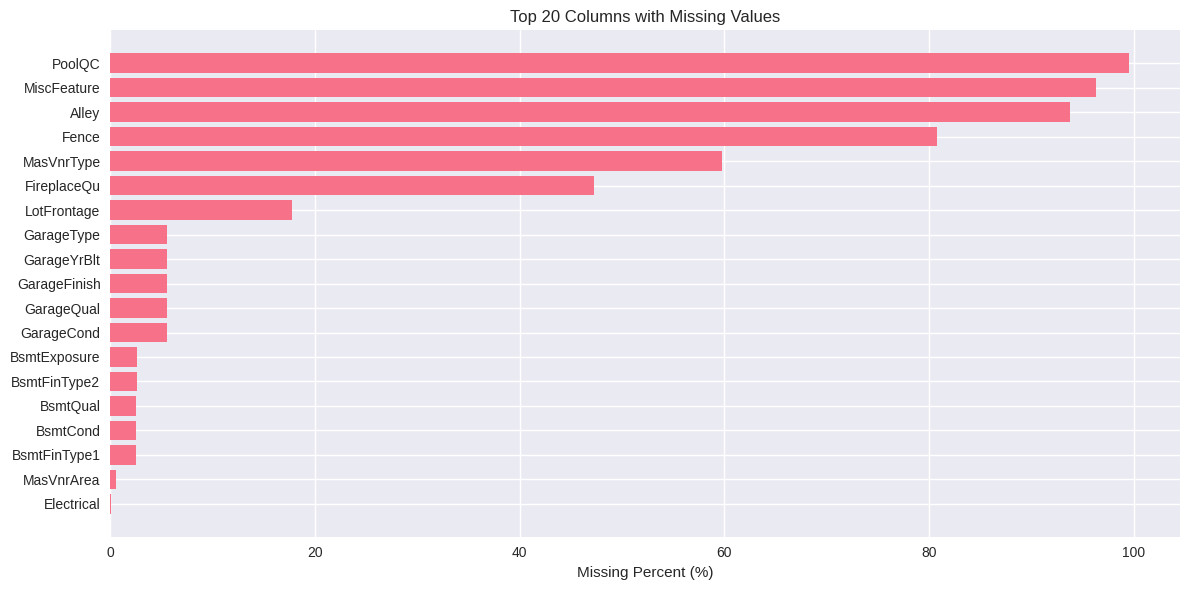

In [44]:
# 결측치 시각화
plt.figure(figsize=(12, 6))
missing_df_top = missing_df.head(20)  # 상위 20개만 표시

# 가로 막대그래프 생성 : plt.barh(y, width)
plt.barh(range(len(missing_df_top)), missing_df_top['Missing Percent']) # barh(가로막대)
plt.yticks(range(len(missing_df_top)), missing_df_top['Column'])
plt.xlabel('Missing Percent (%)')
plt.title('Top 20 Columns with Missing Values')
plt.gca().invert_yaxis()  # 세로 방향 뒤집기 (큰 값이 위로) | gca() = 현재 axes 가져오기
plt.tight_layout()
plt.show()


**결과 해석:**
- 많은 컬럼에 결측치가 있습니다.
- 일부 컬럼(PoolQC, MiscFeature, Alley 등)은 결측치 비율이 매우 높습니다.
- 결측치가 많다는 것은 해당 정보가 없는 주택이 많다는 의미일 수 있습니다.

### 3.4 데이터 타입 확인

수치형 변수(int,float)와 범주형 변수(object)를 구분해야 합니다. 각각 다른 전처리 방법이 필요합니다.


In [46]:
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [45]:
# 데이터 타입별로 분류
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

# 타겟 변수 제외
numeric_cols.remove('SalePrice')

print(f"수치형 변수 개수: {len(numeric_cols)}")
print(f"범주형 변수 개수: {len(categorical_cols)}")
print(f"\n수치형 변수 예시: {numeric_cols[:5]}")
print(f"범주형 변수 예시: {categorical_cols[:5]}")


수치형 변수 개수: 37
범주형 변수 개수: 43

수치형 변수 예시: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']
범주형 변수 예시: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']


## 4. 결측치 처리

결측치를 처리하는 방법은 여러 가지가 있습니다. 데이터의 특성과 결측치의 의미를 고려해서 적절한 방법을 선택해야 합니다.

### 4.1 결측치 처리 방법 개요

**주요 처리 방법:**
1. **삭제 (Deletion)**: 결측치가 있는 행이나 열을 삭제합니다.
   - 장점: 간단함
   - 단점: 정보 손실
   - 사용 시기: 결측치가 매우 적거나, 결측치가 많은 컬럼이 불필요한 경우

2. **대체 (Imputation)**: 결측치를 다른 값으로 채웁니다.
   - **평균/중앙값/최빈값 대체**: 수치형은 평균/중앙값, 범주형은 최빈값
   - **0 또는 특정 값으로 대체**: 결측치가 "없음"을 의미하는 경우
   - **앞/뒤 값으로 채우기 (Forward/Backward Fill)**: 시계열 데이터에 적합
   - **예측 모델로 대체**: 다른 변수들을 이용해 결측치를 예측

3. **새로운 범주 생성**: 범주형 변수에서 결측치를 "Unknown" 같은 새로운 범주로 처리

### 4.2 결측치 처리 전략 수립

먼저 각 컬럼의 결측치 의미를 파악하고 적절한 처리 방법을 선택합니다.


In [ ]:
# 결측치 처리 전략을 위한 분석
# 각 컬럼의 결측치 비율과 데이터 타입 확인

strategy_df = pd.DataFrame({
    'Column': missing_df['Column'],
    'Missing_Percent': missing_df['Missing Percent'],
    'Data_Type': [train_df[col].dtype for col in missing_df['Column']]
})

print("=== 결측치 처리 전략 수립 ===")
print(strategy_df.head(20))


=== 결측치 처리 전략 수립 ===
          Column  Missing_Percent Data_Type
72        PoolQC        99.520548    object
74   MiscFeature        96.301370    object
6          Alley        93.767123    object
73         Fence        80.753425    object
25    MasVnrType        59.726027    object
57   FireplaceQu        47.260274    object
3    LotFrontage        17.739726   float64
58    GarageType         5.547945    object
59   GarageYrBlt         5.547945   float64
60  GarageFinish         5.547945    object
63    GarageQual         5.547945    object
64    GarageCond         5.547945    object
32  BsmtExposure         2.602740    object
35  BsmtFinType2         2.602740    object
30      BsmtQual         2.534247    object
31      BsmtCond         2.534247    object
33  BsmtFinType1         2.534247    object
26    MasVnrArea         0.547945   float64
42    Electrical         0.068493    object


### 4.3 결측치 처리 실습

이제 실제로 결측치를 처리해봅시다.

**처리 전략:**
1. **결측치 비율이 50% 이상인 컬럼**: 삭제 고려 (정보가 거의 없음)
2. **범주형 변수**: "None" 또는 "Unknown"으로 대체 (결측치가 "없음"을 의미하는 경우가 많음)
3. **수치형 변수**: 중앙값 또는 평균으로 대체
4. **특수한 경우**: 각 컬럼의 의미에 맞게 처리


In [ ]:
# 원본 데이터 복사 (원본 보존)
train_processed = train_df.copy()
test_processed = test_df.copy()

print("원본 데이터 결측치 개수:", train_processed.isnull().sum().sum())
print("처리 전 데이터 크기:", train_processed.shape)


원본 데이터 결측치 개수: 7829
처리 전 데이터 크기: (1460, 81)


#### 4.3.1 결측치 비율이 높은 컬럼 삭제

결측치가 50% 이상인 컬럼은 정보가 거의 없으므로 삭제하는 것을 고려합니다.


In [ ]:
# 결측치 비율이 50% 이상인 컬럼 찾기
high_missing_cols = missing_df[missing_df['Missing Percent'] >= 50]['Column'].tolist()

print(f"결측치 비율 50% 이상인 컬럼: {high_missing_cols}")

# 삭제 (선택사항 - 이 실습에서는 유지하고 "None"으로 대체할 예정)
# train_processed = train_processed.drop(columns=high_missing_cols)
# test_processed = test_processed.drop(columns=high_missing_cols)

# or df.dropna(axis=1)를 활용. axis 0은 행 1은 열

print("현재는 삭제하지 않고 유지합니다.")


결측치 비율 50% 이상인 컬럼: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType']
현재는 삭제하지 않고 유지합니다.


#### 4.3.2 범주형 변수 결측치 처리

범주형 변수의 결측치는 보통 "없음"을 의미하므로 "None"으로 대체합니다.


### fillna()

- **역할**
  - 결측치(NaN)를 지정한 값이나 규칙으로 채우는 함수

- **기본 형태**
  ```python
  df.fillna(value=None, method=None, inplace=False)```

- value : NaN을 채울 값 (숫자, 문자열, dict 등)
- method : 채우는 방식 (ffill = 이전 값, bfill = 다음 값)
- axis : 채우기 방향 (0 = 행 기준, 1 = 열 기준)
- inplace : True면 원본 DataFrame에 바로 적용

ex)
```
df.fillna(0)                    # 모든 결측치를 0으로 채움 (수치형)
df.fillna('None')               # 모든 결측치를 문자열로 채움 (범주형)
df.fillna({'A': 0, 'B': 'N/A'}) # 컬럼별로 다른 값 채우기
df.fillna(method='ffill')       # 이전 값으로 채우기
df.fillna(method='bfill')       # 다음 값으로 채우기
df.fillna(0, inplace=True)      # 원본 DataFrame에 바로 적용
```

In [ ]:
# 범주형 변수의 결측치를 "None"으로 대체
# 주택 데이터에서 결측치는 보통 해당 기능이 없다는 의미입니다.

# 학습 데이터와 테스트 데이터 모두 처리
for col in categorical_cols:
    if col in train_processed.columns:
        train_processed[col] = train_processed[col].fillna('None')
    if col in test_processed.columns:
        test_processed[col] = test_processed[col].fillna('None')

print("범주형 변수 결측치 처리 완료!")
print(f"처리 후 결측치 개수: {train_processed[categorical_cols].isnull().sum().sum()}")


범주형 변수 결측치 처리 완료!
처리 후 결측치 개수: 0


#### 4.3.3 수치형 변수 결측치 처리

수치형 변수의 결측치는 중앙값(median)으로 대체합니다. 중앙값은 이상치에 덜 민감하기 때문에 평균보다 안정적입니다.


In [ ]:
# 수치형 변수의 결측치를 중앙값으로 대체
# 학습 데이터의 중앙값을 계산하고, 학습/테스트 데이터 모두에 적용

for col in numeric_cols:
    if col in train_processed.columns:
        median_value = train_processed[col].median()
        train_processed[col] = train_processed[col].fillna(median_value)

    if col in test_processed.columns:
        # 테스트 데이터는 학습 데이터의 중앙값 사용 (데이터 누수 방지)
        median_value = train_processed[col].median()
        test_processed[col] = test_processed[col].fillna(median_value)

print("수치형 변수 결측치 처리 완료!")
print(f"처리 후 수치형 변수 결측치 개수: {train_processed[numeric_cols].isnull().sum().sum()}")


수치형 변수 결측치 처리 완료!
처리 후 수치형 변수 결측치 개수: 0


In [ ]:
# 최종 결측치 확인
print("=== 최종 결측치 확인 ===")
print(f"학습 데이터 총 결측치: {train_processed.isnull().sum().sum()}")
print(f"테스트 데이터 총 결측치: {test_processed.isnull().sum().sum()}")

if train_processed.isnull().sum().sum() > 0:
    print("\n아직 결측치가 있는 컬럼:")
    remaining_missing = train_processed.isnull().sum()
    print(remaining_missing[remaining_missing > 0])
else:
    print("\n✅ 모든 결측치가 처리되었습니다!")


=== 최종 결측치 확인 ===
학습 데이터 총 결측치: 0
테스트 데이터 총 결측치: 0

✅ 모든 결측치가 처리되었습니다!


**결과 해석:**
- 범주형 변수는 "None"으로 대체했습니다.
- 수치형 변수는 중앙값으로 대체했습니다.
- 모든 결측치가 처리되었는지 확인했습니다.

**💡 팁:**
- 실제 프로젝트에서는 각 컬럼의 의미를 고려해서 더 세밀하게 처리해야 합니다.
- 예를 들어, "GarageYrBlt" (차고 건축 연도)의 결측치는 차고가 없다는 의미일 수 있으므로 0이나 특정 값으로 처리할 수 있습니다.

---

## 5. 이상치 처리

이상치(Outliers)는 다른 데이터들과 크게 다른 값을 가진 데이터 포인트입니다. 이상치는 모델 성능에 악영향을 줄 수 있으므로 탐지하고 처리해야 합니다.

### 5.1 이상치 탐지 방법

**주요 탐지 방법:**
1. **IQR (Interquartile Range) 방법**: 가장 널리 사용되는 방법
   - Q1 (1사분위수), Q3 (3사분위수) 계산
   - IQR = Q3 - Q1
   - 이상치: Q1 - 1.5×IQR 보다 작거나, Q3 + 1.5×IQR 보다 큰 값

2. **Z-score 방법**: 평균으로부터 표준편차의 몇 배 떨어져 있는지 측정
   - Z-score > 3 또는 < -3 인 경우 이상치로 간주

3. **시각적 방법**: 박스플롯, 산점도 등을 통해 시각적으로 확인

### 5.2 IQR 방법으로 이상치 탐지

먼저 주요 수치형 변수들에서 이상치를 탐지해봅시다.


In [ ]:
# IQR 방법으로 이상치 탐지 함수 정의
def detect_outliers_iqr(data, column):
    """
    IQR 방법으로 이상치를 탐지하는 함수

    Parameters:
    - data: 데이터프레임
    - column: 이상치를 탐지할 컬럼명

    Returns:
    - 이상치 인덱스 리스트
    """
    Q1 = data[column].quantile(0.25)  # 1사분위수
    Q3 = data[column].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1                      # 사분위수 범위

    lower_bound = Q1 - 1.5 * IQR  # 하한선
    upper_bound = Q3 + 1.5 * IQR  # 상한선

    # 이상치 인덱스 찾기
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index

    return outliers, lower_bound, upper_bound

# 예시: 주요 변수에서 이상치 탐지
important_numeric_cols = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'SalePrice']

outlier_info = {}
for col in important_numeric_cols:
    if col in train_processed.columns:
        outliers, lower, upper = detect_outliers_iqr(train_processed, col)
        outlier_info[col] = {
            'count': len(outliers),
            'lower_bound': lower,
            'upper_bound': upper,
            'indices': outliers
        }
        print(f"{col}: 이상치 {len(outliers)}개 (범위: {lower:.2f} ~ {upper:.2f})")


LotArea: 이상치 69개 (범위: 1481.50 ~ 17673.50)
GrLivArea: 이상치 31개 (범위: 158.62 ~ 2747.62)
TotalBsmtSF: 이상치 61개 (범위: 42.00 ~ 2052.00)
SalePrice: 이상치 61개 (범위: 3937.50 ~ 340037.50)


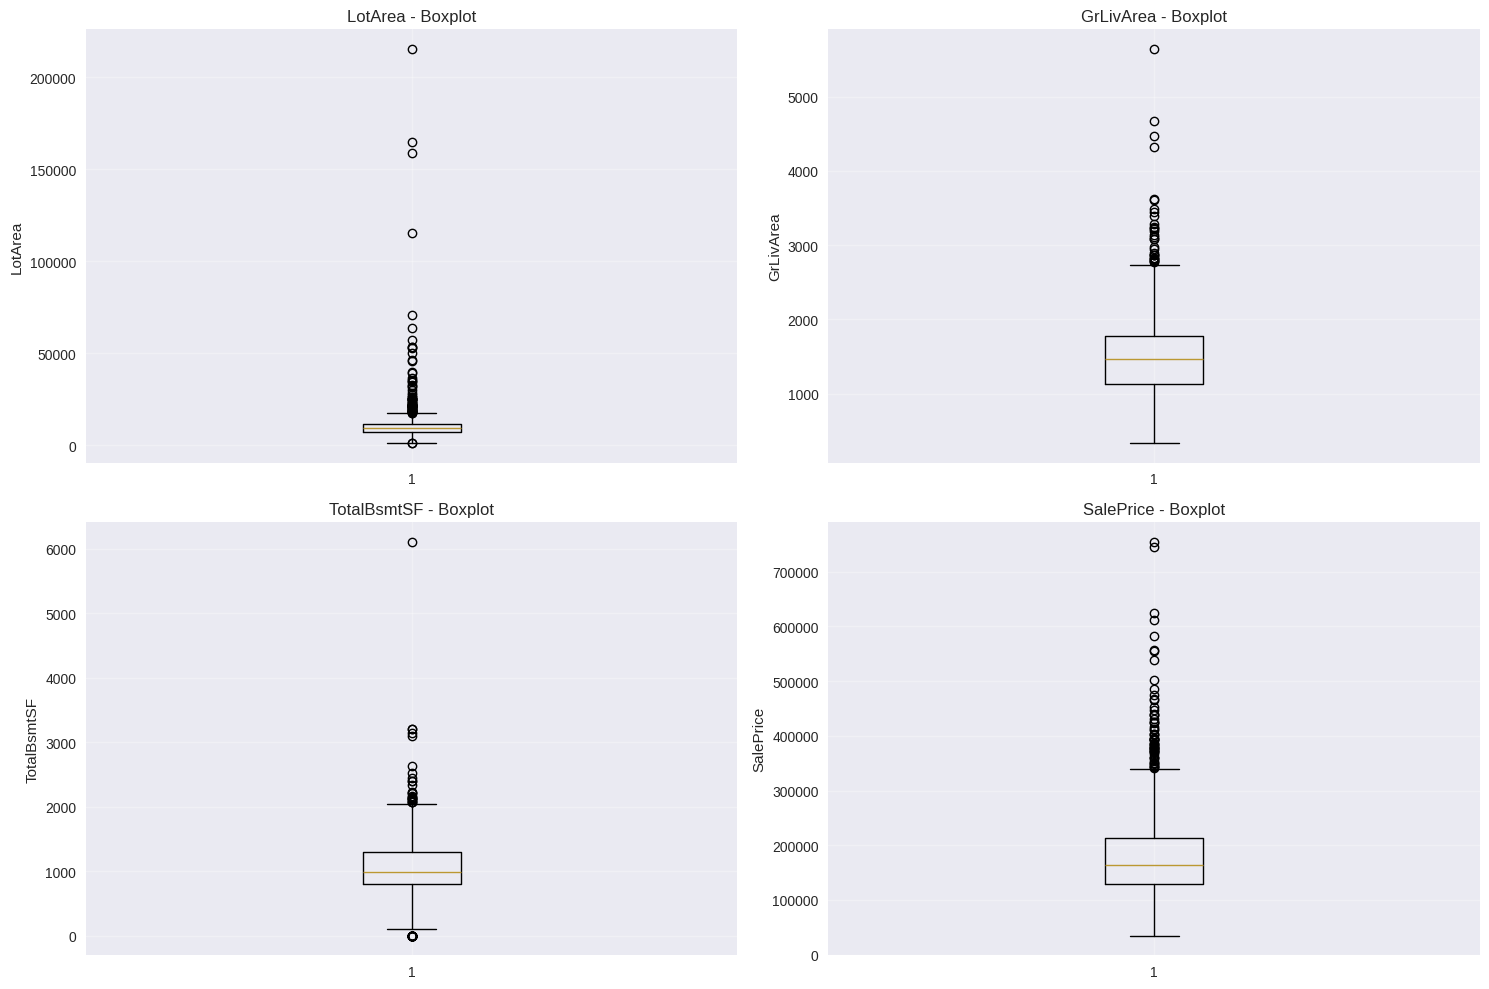

박스플롯에서 박스 밖의 점들이 이상치입니다.


In [ ]:
# 이상치 시각화 - 박스플롯
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(important_numeric_cols):
    if col in train_processed.columns:
        axes[idx].boxplot(train_processed[col], vert=True) # vert=True → 세로 방향 박스플롯
        axes[idx].set_title(f'{col} - Boxplot')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("박스플롯에서 박스 밖의 점들이 이상치입니다.")


**결과 해석:**
- 각 변수마다 이상치가 존재합니다.
- 특히 `LotArea`와 `GrLivArea`에서 많은 이상치가 보입니다.
- 이상치가 많다고 해서 무조건 삭제하는 것은 아닙니다. 이상치의 의미를 고려해야 합니다.

### 5.3 이상치 처리 방법

**주요 처리 방법:**
1. **삭제**: 이상치가 명백히 오류인 경우
2. **변환**: 로그 변환, 제곱근 변환 등으로 분포를 정규화
3. **캡핑(Capping)**: 이상치를 상한/하한 값으로 제한
4. **유지**: 이상치가 실제 데이터이고 의미가 있는 경우

### 5.4 이상치 처리 실습

타겟 변수와 주요 변수에서 이상치를 처리해봅시다.


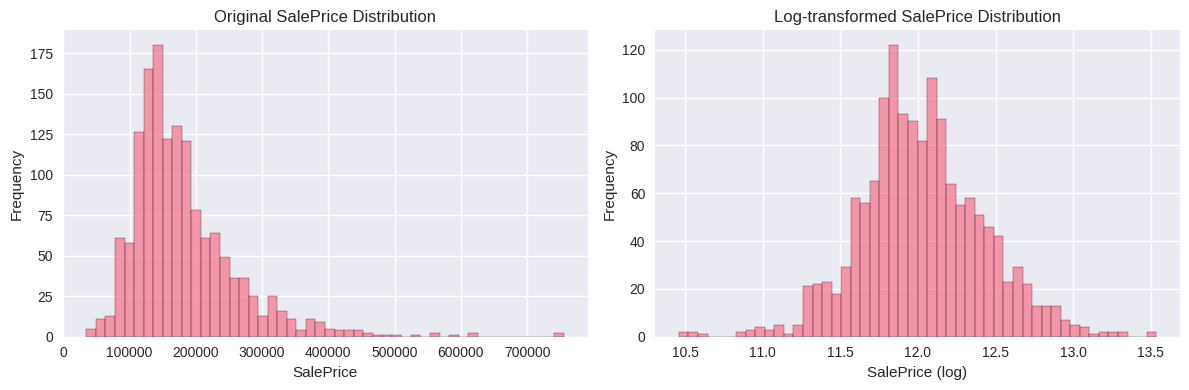

로그 변환 후 분포가 더 정규분포에 가까워졌습니다.


In [ ]:
# 방법 1: 로그 변환 (타겟 변수가 오른쪽으로 치우친 경우)
# 로그 변환은 분포를 정규화하고 이상치의 영향을 줄입니다.

# 원본 타겟 변수 분포 확인
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(train_processed['SalePrice'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Original SalePrice Distribution')
axes[0].set_xlabel('SalePrice')
axes[0].set_ylabel('Frequency')

# 로그 변환 적용
train_processed['SalePrice_log'] = np.log1p(train_processed['SalePrice'])  # log1p는 log(1+x)로 0 값도 처리 가능

axes[1].hist(train_processed['SalePrice_log'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_title('Log-transformed SalePrice Distribution')
axes[1].set_xlabel('SalePrice (log)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("로그 변환 후 분포가 더 정규분포에 가까워졌습니다.")


로그 변환 예시

| x    | ln(x) |
| ---- | ----- |
| 1    | 0.00  |
| 2    | 0.69  |
| 3    | 1.10  |
| 4    | 1.39  |
| 5    | 1.61  |
| 6    | 1.79  |
| 7    | 1.95  |
| 8    | 2.08  |
| 9    | 2.20  |
| 10   | 2.30  |
| 100  | 4.61  |
| 1000 | 6.91  |

In [ ]:
# 방법 2: IQR 방법으로 이상치 제거 (선택적)
# 주의: 이상치가 많으면 데이터가 많이 줄어들 수 있습니다.

# 예시: GrLivArea에서 이상치 제거
outliers_grliv, _, _ = detect_outliers_iqr(train_processed, 'GrLivArea')
print(f"GrLivArea 이상치 개수: {len(outliers_grliv)}")

# 이상치 제거 (선택사항 - 이 실습에서는 유지)
# train_processed = train_processed.drop(outliers_grliv)
# print(f"이상치 제거 후 데이터 크기: {train_processed.shape}")

print("현재는 이상치를 유지합니다. 실제 프로젝트에서는 데이터 특성에 따라 결정하세요.")


GrLivArea 이상치 개수: 31
현재는 이상치를 유지합니다. 실제 프로젝트에서는 데이터 특성에 따라 결정하세요.


In [ ]:
# 방법 3: 캡핑 (Capping) - 이상치를 상한/하한 값으로 제한
# 이상치를 삭제하지 않고 제한하는 방법입니다.

def cap_outliers(data, column, lower_percentile=1, upper_percentile=99):
    """
    이상치를 특정 백분위수 값으로 제한하는 함수
    """
    lower_bound = data[column].quantile(lower_percentile / 100)
    upper_bound = data[column].quantile(upper_percentile / 100)

    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

# 예시: LotArea에 캡핑 적용 (원본 보존을 위해 복사본 사용)
train_capped = train_processed.copy()
train_capped = cap_outliers(train_capped, 'LotArea')

print(f"원본 LotArea 범위: {train_processed['LotArea'].min():.0f} ~ {train_processed['LotArea'].max():.0f}")
print(f"캡핑 후 LotArea 범위: {train_capped['LotArea'].min():.0f} ~ {train_capped['LotArea'].max():.0f}")

print("\n💡 실제 프로젝트에서는 캡핑을 적용할지 말지는 데이터 특성에 따라 결정하세요.")


원본 LotArea 범위: 1300 ~ 215245
캡핑 후 LotArea 범위: 1680 ~ 37568

💡 실제 프로젝트에서는 캡핑을 적용할지 말지는 데이터 특성에 따라 결정하세요.


**결과 해석:**
- 로그 변환은 타겟 변수의 분포를 정규화하는 데 효과적입니다.
- 이상치 제거는 데이터 손실을 가져올 수 있으므로 신중하게 결정해야 합니다.
- 캡핑은 이상치를 완화하면서도 데이터를 유지할 수 있는 방법입니다.

**💡 팁:**
- 이상치 처리는 도메인 지식이 중요합니다. 예를 들어, 매우 큰 주택이 실제로 존재할 수 있습니다.
- 타겟 변수에 로그 변환을 적용하면 회귀 모델의 성능이 향상될 수 있습니다.

---

## 6. 스케일링

스케일링(Scaling)은 서로 다른 범위를 가진 변수들을 같은 스케일로 맞추는 과정입니다. 많은 머신러닝 알고리즘은 스케일링이 필요합니다.

### 6.1 스케일링이 필요한 이유

**왜 스케일링이 필요한가?**
- 변수들의 범위가 다르면 (예: 나이 0-100, 소득 0-1000000) 알고리즘이 큰 값에 더 영향을 받습니다.
- 거리 기반 알고리즘(KNN, 클러스터링 등)은 스케일링이 필수입니다.
- 경사 하강법을 사용하는 알고리즘은 스케일링이 있으면 더 빠르게 수렴합니다.

**스케일링이 필요하지 않은 경우:**
- 트리 기반 알고리즘 (Random Forest, XGBoost 등)은 스케일링이 필요 없습니다.

### 6.2 주요 스케일링 방법

1. **StandardScaler (표준화)**: 평균 0, 표준편차 1로 변환
   - 공식: (x - mean) / std
   - 정규분포에 가까운 데이터에 적합

2. **MinMaxScaler (정규화)**: 0과 1 사이의 값으로 변환
   - 공식: (x - min) / (max - min)
   - 최솟값과 최댓값을 알고 있는 경우에 적합

3. **RobustScaler**: 중앙값과 IQR을 사용 (이상치에 강함)
   - 공식: (x - median) / IQR
   - 이상치가 많은 데이터에 적합

### 6.3 스케일링 실습

주요 수치형 변수들에 스케일링을 적용해봅시다.


In [ ]:
# 스케일링 전 데이터 확인
print("=== 스케일링 전 주요 변수 통계 ===")
print(train_processed[important_numeric_cols[:3]].describe())


=== 스케일링 전 주요 변수 통계 ===
             LotArea    GrLivArea  TotalBsmtSF
count    1460.000000  1460.000000  1460.000000
mean    10516.828082  1515.463699  1057.429452
std      9981.264932   525.480383   438.705324
min      1300.000000   334.000000     0.000000
25%      7553.500000  1129.500000   795.750000
50%      9478.500000  1464.000000   991.500000
75%     11601.500000  1776.750000  1298.250000
max    215245.000000  5642.000000  6110.000000


In [ ]:
# StandardScaler 적용
# 주의: 학습 데이터로 fit하고, 학습/테스트 데이터 모두에 transform 적용

scaler_standard = StandardScaler()

# 학습 데이터에 fit (평균과 표준편차 계산)
train_scaled_standard = train_processed.copy()
test_scaled_standard = test_processed.copy()

# 수치형 변수만 스케일링 (타겟 변수 제외)
numeric_cols_to_scale = [col for col in numeric_cols if col in train_scaled_standard.columns]

# 학습 데이터 fit & transform
train_scaled_standard[numeric_cols_to_scale] = scaler_standard.fit_transform(
    train_scaled_standard[numeric_cols_to_scale]
)

# 테스트 데이터 transform (학습 데이터의 평균/표준편차 사용)
test_scaled_standard[numeric_cols_to_scale] = scaler_standard.transform(
    test_scaled_standard[numeric_cols_to_scale]
)

print("=== StandardScaler 적용 후 ===")
print(train_scaled_standard[important_numeric_cols[:3]].describe())
print("\n평균이 0에 가깝고, 표준편차가 1에 가까워졌습니다!")


=== StandardScaler 적용 후 ===
            LotArea     GrLivArea   TotalBsmtSF
count  1.460000e+03  1.460000e+03  1.460000e+03
mean  -5.840077e-17 -1.277517e-16  2.457699e-16
std    1.000343e+00  1.000343e+00  1.000343e+00
min   -9.237292e-01 -2.249120e+00 -2.411167e+00
25%   -2.969908e-01 -7.347485e-01 -5.966855e-01
50%   -1.040633e-01 -9.797004e-02 -1.503334e-01
75%    1.087080e-01  4.974036e-01  5.491227e-01
max    2.051827e+01  7.855574e+00  1.152095e+01

평균이 0에 가깝고, 표준편차가 1에 가까워졌습니다!


In [ ]:
# MinMaxScaler 적용
scaler_minmax = MinMaxScaler()

train_scaled_minmax = train_processed.copy()
test_scaled_minmax = test_processed.copy()

# 학습 데이터 fit & transform
train_scaled_minmax[numeric_cols_to_scale] = scaler_minmax.fit_transform(
    train_scaled_minmax[numeric_cols_to_scale]
)

# 테스트 데이터 transform
test_scaled_minmax[numeric_cols_to_scale] = scaler_minmax.transform(
    test_scaled_minmax[numeric_cols_to_scale]
)

print("=== MinMaxScaler 적용 후 ===")
print(train_scaled_minmax[important_numeric_cols[:3]].describe())
print("\n모든 값이 0과 1 사이로 변환되었습니다!")


=== MinMaxScaler 적용 후 ===
           LotArea    GrLivArea  TotalBsmtSF
count  1460.000000  1460.000000  1460.000000
mean      0.043080     0.222582     0.173065
std       0.046653     0.098998     0.071801
min       0.000000     0.000000     0.000000
25%       0.029229     0.149868     0.130237
50%       0.038227     0.212886     0.162275
75%       0.048150     0.271807     0.212480
max       1.000000     1.000000     1.000000

모든 값이 0과 1 사이로 변환되었습니다!


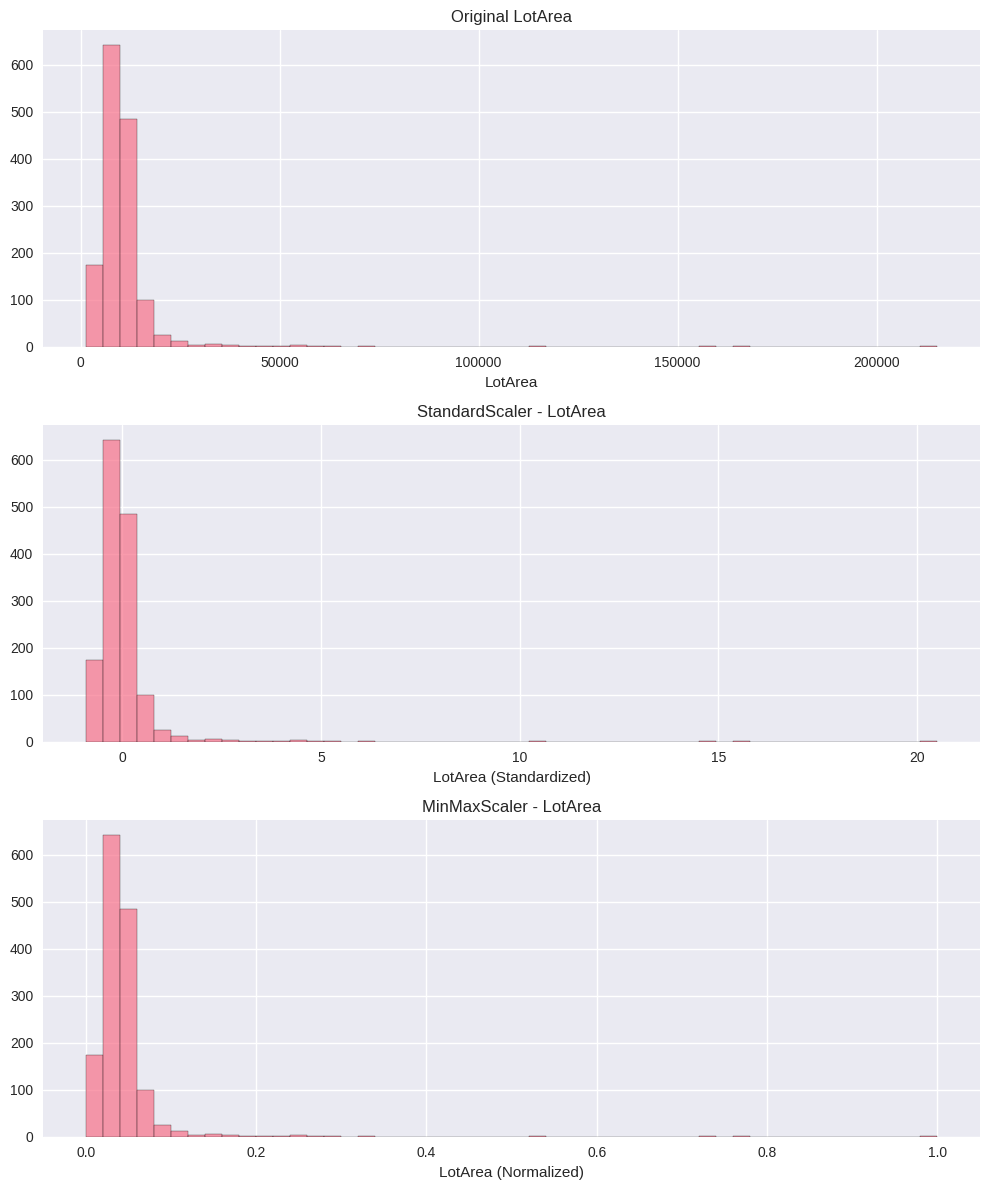

In [ ]:
# 스케일링 비교 시각화
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

col_to_compare = 'LotArea'

# 원본
axes[0].hist(train_processed[col_to_compare], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title(f'Original {col_to_compare}')
axes[0].set_xlabel(col_to_compare)

# StandardScaler
axes[1].hist(train_scaled_standard[col_to_compare], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_title(f'StandardScaler - {col_to_compare}')
axes[1].set_xlabel(f'{col_to_compare} (Standardized)')

# MinMaxScaler
axes[2].hist(train_scaled_minmax[col_to_compare], bins=50, edgecolor='black', alpha=0.7)
axes[2].set_title(f'MinMaxScaler - {col_to_compare}')
axes[2].set_xlabel(f'{col_to_compare} (Normalized)')

plt.tight_layout()
plt.show()


**결과 해석:**
- StandardScaler: 분포의 형태는 유지되지만 평균이 0, 표준편차가 1이 됩니다.
- MinMaxScaler: 모든 값이 0과 1 사이로 압축됩니다.
- 두 방법 모두 변수 간의 스케일 차이를 제거합니다.

**💡 중요:**
- 학습 데이터로 fit한 scaler를 테스트 데이터에 적용해야 합니다!
- 테스트 데이터로 fit하면 데이터 누수(data leakage)가 발생합니다.

---

## 7. 범주형 데이터 인코딩

머신러닝 알고리즘은 대부분 수치형 데이터만 처리할 수 있습니다. 따라서 범주형 변수를 수치로 변환해야 합니다. 이를 인코딩(Encoding)이라고 합니다.

### 7.1 인코딩 방법 개요

**주요 인코딩 방법:**

1. **Label Encoding (라벨 인코딩)**
   - 각 범주를 0, 1, 2, ... 같은 정수로 변환
   - 예: ['A', 'B', 'C'] → [0, 1, 2]
   - 단점: 순서가 없는 범주에 순서를 부여하게 됨 (A < B < C로 해석될 수 있음)
   - 사용: 순서가 있는 범주형 변수(ordinal)에 적합

2. **One-Hot Encoding (원-핫 인코딩)**
   - 각 범주를 별도의 이진 컬럼으로 변환
   - 예: ['A', 'B', 'C'] → [1,0,0], [0,1,0], [0,0,1]
   - 장점: 순서 정보가 없음
   - 단점: 범주가 많으면 컬럼 수가 급격히 증가 (차원의 저주)
   - 사용: 순서가 없는 범주형 변수(nominal)에 적합


### 7.2 인코딩 실습

범주형 변수들을 인코딩해봅시다.


In [ ]:
# 범주형 변수 확인
print(f"범주형 변수 개수: {len(categorical_cols)}")
print(f"\n범주형 변수 예시:")
for col in categorical_cols[:5]:
    unique_count = train_processed[col].nunique()
    print(f"  {col}: {unique_count}개의 고유값")
    print(f"    예시: {train_processed[col].unique()[:5]}")


범주형 변수 개수: 43

범주형 변수 예시:
  MSZoning: 5개의 고유값
    예시: ['RL' 'RM' 'C (all)' 'FV' 'RH']
  Street: 2개의 고유값
    예시: ['Pave' 'Grvl']
  Alley: 3개의 고유값
    예시: ['None' 'Grvl' 'Pave']
  LotShape: 4개의 고유값
    예시: ['Reg' 'IR1' 'IR2' 'IR3']
  LandContour: 4개의 고유값
    예시: ['Lvl' 'Bnk' 'Low' 'HLS']


#### 7.2.1 Label Encoding

순서가 있는 범주형 변수(예: 품질 등급)에 Label Encoding을 적용합니다.


In [ ]:
# Label Encoding 예시
# 순서가 있는 범주형 변수 예시: 'Ex', 'Gd', 'TA', 'Fa', 'Po' (품질 등급)

# 예시로 'ExterQual' 변수를 인코딩
label_encoder = LabelEncoder()

# 학습 데이터로 fit
train_encoded = train_processed.copy()
test_encoded = test_processed.copy()

# 예시: 하나의 변수만 인코딩 (실제로는 여러 변수에 적용)
example_col = 'ExterQual'
if example_col in train_encoded.columns:
    # 학습 데이터 fit & transform
    train_encoded[f'{example_col}_encoded'] = label_encoder.fit_transform(train_encoded[example_col])

    # 테스트 데이터 transform (학습 데이터의 매핑 사용)
    # 주의: 테스트 데이터에 학습 데이터에 없는 범주가 있을 수 있음
    test_encoded[f'{example_col}_encoded'] = label_encoder.transform(test_encoded[example_col])

    print(f"=== {example_col} Label Encoding ===")
    print("원본 값 → 인코딩된 값:")
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    for original, encoded in mapping.items():
        print(f"  {original} → {encoded}")


=== ExterQual Label Encoding ===
원본 값 → 인코딩된 값:
  Ex → 0
  Fa → 1
  Gd → 2
  TA → 3


#### 7.2.2 One-Hot Encoding

순서가 없는 범주형 변수(예: 지역, 브랜드)에 One-Hot Encoding을 적용합니다.


In [ ]:
# One-Hot Encoding 예시
# pandas의 get_dummies 함수 사용 (더 간단함)

# 예시로 'MSZoning' 변수를 인코딩
example_col_oh = 'MSZoning'

if example_col_oh in train_encoded.columns:
    # 원본 값 확인
    print(f"=== {example_col_oh} 원본 값 ===")
    print(train_encoded[example_col_oh].value_counts())

    # One-Hot Encoding
    # 학습 데이터
    train_dummies = pd.get_dummies(train_encoded[example_col_oh], prefix=example_col_oh)

    # 테스트 데이터 (학습 데이터와 같은 컬럼 구조 유지)
    test_dummies = pd.get_dummies(test_encoded[example_col_oh], prefix=example_col_oh)

    print(f"\n=== One-Hot Encoding 결과 ===")
    print(f"원본 컬럼 1개 → 인코딩된 컬럼 {len(train_dummies.columns)}개")
    print(f"인코딩된 컬럼: {list(train_dummies.columns)}")
    print(f"\n인코딩 결과 샘플:")
    print(train_dummies.head())


=== MSZoning 원본 값 ===
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

=== One-Hot Encoding 결과 ===
원본 컬럼 1개 → 인코딩된 컬럼 5개
인코딩된 컬럼: ['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM']

인코딩 결과 샘플:
   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
0             False        False        False         True        False
1             False        False        False         True        False
2             False        False        False         True        False
3             False        False        False         True        False
4             False        False        False         True        False


In [ ]:
# # One-Hot Encoding (scikit-learn 버전)

# from sklearn.preprocessing import OneHotEncoder

# example_col_oh = 'MSZoning'

# if example_col_oh in train_encoded.columns:
#     # OneHotEncoder 생성
#     ohe = OneHotEncoder(
#         sparse_output=False,        # 결과를 numpy array로 반환
#     )

#     # 학습 데이터로 fit
#     train_ohe = ohe.fit_transform(train_encoded[[example_col_oh]])

#     # 테스트 데이터는 transform만
#     test_ohe = ohe.transform(test_encoded[[example_col_oh]])

#     # 컬럼명 생성
#     ohe_cols = ohe.get_feature_names_out([example_col_oh])

#     # DataFrame으로 변환
#     train_dummies = pd.DataFrame(train_ohe, columns=ohe_cols, index=train_encoded.index)
#     test_dummies  = pd.DataFrame(test_ohe,  columns=ohe_cols, index=test_encoded.index)

#     print(f"=== One-Hot Encoding 결과 (scikit-learn) ===")
#     print(f"원본 컬럼 1개 → 인코딩된 컬럼 {len(ohe_cols)}개")
#     print(f"인코딩된 컬럼: {list(ohe_cols)}")
#     print("\n인코딩 결과 샘플:")
#     print(train_dummies.head())


=== One-Hot Encoding 결과 (scikit-learn) ===
원본 컬럼 1개 → 인코딩된 컬럼 5개
인코딩된 컬럼: ['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM']

인코딩 결과 샘플:
   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
0               0.0          0.0          0.0          1.0          0.0
1               0.0          0.0          0.0          1.0          0.0
2               0.0          0.0          0.0          1.0          0.0
3               0.0          0.0          0.0          1.0          0.0
4               0.0          0.0          0.0          1.0          0.0


**결과 해석:**
- Label Encoding: 각 범주가 정수로 변환되었습니다.
- One-Hot Encoding: 각 범주가 별도의 이진 컬럼으로 변환되었습니다.

**💡 팁:**
- 범주가 많은 변수(예: 20개 이상)에 One-Hot Encoding을 적용하면 차원이 너무 커질 수 있습니다.
- 이 경우 Target Encoding이나 다른 방법을 고려해야 합니다.
- 실제 프로젝트에서는 모든 범주형 변수에 적절한 인코딩을 적용해야 합니다.

---

## 8. 전처리 파이프라인

지금까지 배운 전처리 단계들을 하나의 파이프라인으로 정리해봅시다. 실제 프로젝트에서는 이런 파이프라인을 만들어서 재사용합니다.

### 8.1 전처리 함수 정의

전처리 단계를 함수로 만들어서 체계적으로 관리합니다.


In [ ]:
def preprocess_data(train_df, test_df, target_col='SalePrice'):
    """
    데이터 전처리 파이프라인 함수

    Parameters:
    - train_df: 학습 데이터프레임
    - test_df: 테스트 데이터프레임
    - target_col: 타겟 변수 컬럼명

    Returns:
    - 전처리된 학습/테스트 데이터프레임
    """
    # 1. 데이터 복사
    train = train_df.copy()
    test = test_df.copy()

    # 타겟 변수 분리
    if target_col in train.columns:
        y_train = train[target_col]
        train = train.drop(columns=[target_col])
    else:
        y_train = None

    # 2. 결측치 처리
    # 범주형 변수: 'None'으로 대체
    categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
    for col in categorical_cols:
        if col in train.columns:
            train[col] = train[col].fillna('None')
        if col in test.columns:
            test[col] = test[col].fillna('None')

    # 수치형 변수: 중앙값으로 대체
    numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
    for col in numeric_cols:
        if col in train.columns:
            median_value = train[col].median()
            train[col] = train[col].fillna(median_value)
        if col in test.columns:
            median_value = train[col].median()  # 학습 데이터의 중앙값 사용
            test[col] = test[col].fillna(median_value)

    # 3. 범주형 변수 인코딩 (간단한 예시 - 실제로는 더 세밀하게 처리)
    # One-Hot Encoding 적용
    train_encoded = pd.get_dummies(train, columns=categorical_cols, dummy_na=False)
    test_encoded = pd.get_dummies(test, columns=categorical_cols, dummy_na=False)

    # 컬럼 맞추기 (학습/테스트 데이터의 컬럼이 다를 수 있음)
    common_cols = list(set(train_encoded.columns) & set(test_encoded.columns))
    train_encoded = train_encoded[common_cols]
    test_encoded = test_encoded[common_cols]

    # 4. 스케일링 (선택사항 - 트리 기반 모델은 필요 없음)
    # 이 예시에서는 스케일링을 적용하지 않습니다.

    return train_encoded, test_encoded, y_train

print("전처리 함수 정의 완료!")


전처리 함수 정의 완료!


In [ ]:
# 전처리 파이프라인 실행
print("전처리 시작...")
X_train_processed, X_test_processed, y_train_processed = preprocess_data(
    train_df, test_df, target_col='SalePrice'
)

print(f"\n전처리 완료!")
print(f"학습 데이터 크기: {X_train_processed.shape}")
print(f"테스트 데이터 크기: {X_test_processed.shape}")
print(f"타겟 변수 크기: {y_train_processed.shape if y_train_processed is not None else 'None'}")

print(f"\n결측치 확인:")
print(f"학습 데이터 결측치: {X_train_processed.isnull().sum().sum()}")
print(f"테스트 데이터 결측치: {X_test_processed.isnull().sum().sum()}")


전처리 시작...

전처리 완료!
학습 데이터 크기: (1460, 285)
테스트 데이터 크기: (1459, 285)
타겟 변수 크기: (1460,)

결측치 확인:
학습 데이터 결측치: 0
테스트 데이터 결측치: 0


**결과 해석:**
- 전처리 파이프라인이 성공적으로 실행되었습니다.
- 모든 결측치가 처리되었고, 범주형 변수가 인코딩되었습니다.
- 이제 이 데이터를 머신러닝 모델에 사용할 수 있습니다!

**💡 실제 프로젝트 팁:**
- 전처리 파이프라인을 함수나 클래스로 만들어 재사용합니다.
- 각 단계를 모듈화하면 디버깅과 수정이 쉬워집니다.

---

## 9. 연습문제

이제 배운 내용을 바탕으로 스스로 연습해봅시다!

### 연습문제 1: 결측치 분석
다음 코드를 실행하고 결과를 해석해보세요.

```python
# 각 컬럼의 결측치 비율을 계산하고,
# 결측치 비율이 30% 이상인 컬럼들을 찾아보세요.
# 그리고 그 컬럼들을 어떻게 처리할지 계획을 세워보세요.
```

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

### 연습문제 2: 이상치 탐지
다음 코드를 실행하고 결과를 해석해보세요.

```python
# 'GrLivArea' 변수에서 이상치를 IQR 방법으로 찾고,시각화하세요.
# 그리고 이상치를 어떻게 처리할지 결정해보세요.
```

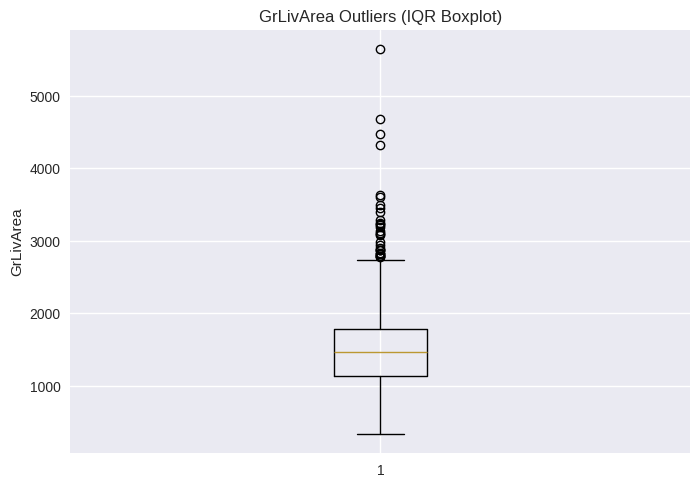

### 연습문제 3: 스케일링 비교
다음 코드를 실행하고 결과를 해석해보세요.

```python
# 'LotArea' 변수에 StandardScaler와 MinMaxScaler를 각각 적용하고,
# 두 결과를 비교해보세요.
# 어떤 스케일러가 더 적합한지 생각해보세요.
```

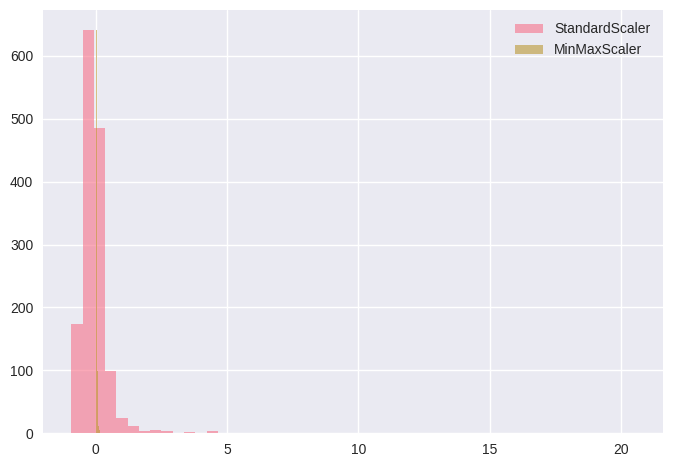

### 연습문제 4: 인코딩 선택
다음 코드를 실행하고 결과를 해석해보세요.

```python
# 'Neighborhood' 변수를 확인하고,
# Label Encoding과 One-Hot Encoding 중 어떤 것이 더 적합한지 판단해보세요.
# 실제로 두 방법을 모두 적용하고 비교해보세요.
```

---

[ 5 24  5 ...  6 12  7]
      Blmngtn  Blueste  BrDale  BrkSide  ClearCr  CollgCr  Crawfor  Edwards  \
0       False    False   False    False    False     True    False    False   
1       False    False   False    False    False    False    False    False   
2       False    False   False    False    False     True    False    False   
3       False    False   False    False    False    False     True    False   
4       False    False   False    False    False    False    False    False   
...       ...      ...     ...      ...      ...      ...      ...      ...   
1455    False    False   False    False    False    False    False    False   
1456    False    False   False    False    False    False    False    False   
1457    False    False   False    False    False    False     True    False   
1458    False    False   False    False    False    False    False    False   
1459    False    False   False    False    False    False    False     True   

      Gilbert  IDOTRR  Mead

(None, None)

## ✅ 연습문제 정답 코드

---

### 연습문제 1: 결측치 분석
<details>
<summary>정답 코드 보기</summary>

~~~python
missing_ratio = train_df.isnull().mean() * 100
high_missing_cols = missing_ratio[missing_ratio >= 30].index.tolist()
high_missing_cols
~~~

</details>

---

### 연습문제 2: 이상치 탐지 (IQR)
<details>
<summary>정답 코드 보기</summary>

~~~python
Q1 = train_df['GrLivArea'].quantile(0.25)
Q3 = train_df['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outlier_mask = (train_df['GrLivArea'] < lower) | (train_df['GrLivArea'] > upper)
outliers = train_df[outlier_mask]

plt.boxplot(train_df['GrLivArea'].dropna(), vert=True)
plt.ylabel('GrLivArea')
plt.title('GrLivArea Outliers (IQR Boxplot)')
plt.show()

outliers[['GrLivArea', 'SalePrice']]
~~~

</details>

---

### 연습문제 3: 스케일링 비교
<details>
<summary>정답 코드 보기</summary>

~~~python
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

lotarea_std = std_scaler.fit_transform(train_df[['LotArea']])
lotarea_mm  = mm_scaler.fit_transform(train_df[['LotArea']])

plt.hist(lotarea_std, bins=50, alpha=0.6, label='StandardScaler')
plt.hist(lotarea_mm, bins=50, alpha=0.6, label='MinMaxScaler')
plt.legend()
plt.show()
~~~

</details>

---

### 연습문제 4: 인코딩 선택
<details>
<summary>정답 코드 보기</summary>

~~~python
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
neigh_label = le.fit_transform(train_df['Neighborhood'])

neigh_onehot = pd.get_dummies(train_df['Neighborhood'])

neigh_label[:5], neigh_onehot.shape
~~~

</details>
